In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

import random

import warnings
warnings.filterwarnings("ignore")

import os
import os.path
from pathlib import Path

# Data Preperation

In [3]:
import tensorflow as tf
import numpy as np
import os

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/MSI KATANA/Desktop/practice ML/Computer-vision-projects-by-Inupa-Bandara/Dog breed Classification/dataset',
    image_size=(128, 128),  # Resize to 128x128 to match the example
    batch_size=32,
    shuffle=False  # Keep the data in order to easily split by class
)

Found 967 files belonging to 10 classes.


In [4]:
# Initialize lists to store images and labels for each class
Beagle_images = []
Boxer_images = []
Bulldog_images = []
Dachshund_images = []
German_Shepherd_images = []
Golden_Retriever_images = []
Labrador_Retriever_images = []
Poodle_images = []
Rottweiler_images = []
Yorkshire_Terrier_images = []


In [7]:
# Assuming the dataset classes are in alphabetical order and labels are 0-9
class_dict = {
    0: Beagle_images,
    1: Boxer_images,
    2: Bulldog_images,
    3: Dachshund_images,
    4: German_Shepherd_images,
    5: Golden_Retriever_images,
    6: Labrador_Retriever_images,
    7: Poodle_images,
    8: Rottweiler_images,
    9: Yorkshire_Terrier_images
}

# Iterate through the dataset and separate the images and labels based on class
for images, labels in dataset:
    images_np = images.numpy()
    labels_np = labels.numpy()

    for i, label in enumerate(labels_np):
        class_dict[label].append(images_np[i])

In [8]:
# Convert lists to numpy arrays
Beagle_images = np.array(Beagle_images)
Boxer_images = np.array(Boxer_images)
Bulldog_images = np.array(Bulldog_images)
Dachshund_images = np.array(Dachshund_images)
German_Shepherd_images = np.array(German_Shepherd_images)
Golden_Retriever_images = np.array(Golden_Retriever_images)
Labrador_Retriever_images = np.array(Labrador_Retriever_images)
Poodle_images = np.array(Poodle_images)
Rottweiler_images = np.array(Rottweiler_images)
Yorkshire_Terrier_images = np.array(Yorkshire_Terrier_images)

In [9]:
# Create labels for each class
Beagle_labels = np.zeros(len(Beagle_images), dtype=int)
Boxer_labels = np.ones(len(Boxer_images), dtype=int)
Bulldog_labels = np.full(len(Bulldog_images), 2, dtype=int)
Dachshund_labels = np.full(len(Dachshund_images), 3, dtype=int)
German_Shepherd_labels = np.full(len(German_Shepherd_images), 4, dtype=int)
Golden_Retriever_labels = np.full(len(Golden_Retriever_images), 5, dtype=int)
Labrador_Retriever_labels = np.full(len(Labrador_Retriever_images), 6, dtype=int)
Poodle_labels = np.full(len(Poodle_images), 7, dtype=int)
Rottweiler_labels = np.full(len(Rottweiler_images), 8, dtype=int)
Yorkshire_Terrier_labels = np.full(len(Yorkshire_Terrier_images), 9, dtype=int)

In [10]:
# Combine data and labels
X = np.concatenate((Beagle_images, Boxer_images, Bulldog_images, Dachshund_images, 
                    German_Shepherd_images, Golden_Retriever_images, Labrador_Retriever_images, 
                    Poodle_images, Rottweiler_images, Yorkshire_Terrier_images), axis=0)
y = np.concatenate((Beagle_labels, Boxer_labels, Bulldog_labels, Dachshund_labels, 
                    German_Shepherd_labels, Golden_Retriever_labels, Labrador_Retriever_labels, 
                    Poodle_labels, Rottweiler_labels, Yorkshire_Terrier_labels), axis=0)

In [11]:
# Print shapes to verify
print(f'Total images: {X.shape[0]}')
print(f'Beagle images: {Beagle_images.shape[0]}')
print(f'Boxer images: {Boxer_images.shape[0]}')
print(f'Bulldog images: {Bulldog_images.shape[0]}')
print(f'Dachshund images: {Dachshund_images.shape[0]}')
print(f'German Shepherd images: {German_Shepherd_images.shape[0]}')
print(f'Golden Retriever images: {Golden_Retriever_images.shape[0]}')
print(f'Labrador Retriever images: {Labrador_Retriever_images.shape[0]}')
print(f'Poodle images: {Poodle_images.shape[0]}')
print(f'Rottweiler images: {Rottweiler_images.shape[0]}')
print(f'Yorkshire Terrier images: {Yorkshire_Terrier_images.shape[0]}')
print(f'Labels shape: {y.shape}')

Total images: 2901
Beagle images: 300
Boxer images: 300
Bulldog images: 300
Dachshund images: 288
German Shepherd images: 288
Golden Retriever images: 273
Labrador Retriever images: 285
Poodle images: 300
Rottweiler images: 267
Yorkshire Terrier images: 300
Labels shape: (2901,)


In [14]:
print (X)

[[[[0.         0.00784314 0.        ]
   [0.0046875  0.01409314 0.        ]
   [0.02218137 0.03394608 0.0078125 ]
   ...
   [0.13318014 0.20505515 0.12794118]
   [0.06344976 0.12068015 0.04381127]
   [0.05333946 0.10091912 0.01568628]]

  [[0.0029565  0.01375613 0.        ]
   [0.00646602 0.01765017 0.        ]
   [0.02218137 0.03394608 0.0078125 ]
   ...
   [0.14502923 0.21690422 0.14274675]
   [0.08652428 0.14375466 0.07162081]
   [0.08507559 0.13265525 0.05333539]]

  [[0.0125596  0.02895053 0.00632492]
   [0.0089079  0.02529883 0.00139148]
   [0.01833221 0.03472314 0.0078125 ]
   ...
   [0.14737909 0.21771802 0.1506879 ]
   [0.09729112 0.15452151 0.08716802]
   [0.10577177 0.15134552 0.08228664]]

  ...

  [[0.5675398  0.47342217 0.42636335]
   [0.57406557 0.47994792 0.4328891 ]
   [0.58399206 0.4898744  0.44281557]
   ...
   [0.56830573 0.48203126 0.43105087]
   [0.56781554 0.48154107 0.43056065]
   [0.57094055 0.48466605 0.43368566]]

  [[0.5642616  0.470144   0.42308518]
   [0.5

In [19]:
from pathlib import Path
import pandas as pd
import os

# Define the path to the dataset directory
image_dir = Path('C:/Users/MSI KATANA/Desktop/practice ML/Computer-vision-projects-by-Inupa-Bandara/Dog breed Classification/dataset')

# Collect all image file paths from the dataset directory
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

# Extract labels from the file paths (folder names are used as labels)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# Convert filepaths and labels to pandas Series
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Combine filepaths and labels into a DataFrame
image_df = pd.concat([filepaths, labels], axis=1)

# Display the DataFrame
print(image_df.head())


                                            Filepath   Label
0  C:\Users\MSI KATANA\Desktop\practice ML\Comput...  Beagle
1  C:\Users\MSI KATANA\Desktop\practice ML\Comput...  Beagle
2  C:\Users\MSI KATANA\Desktop\practice ML\Comput...  Beagle
3  C:\Users\MSI KATANA\Desktop\practice ML\Comput...  Beagle
4  C:\Users\MSI KATANA\Desktop\practice ML\Comput...  Beagle


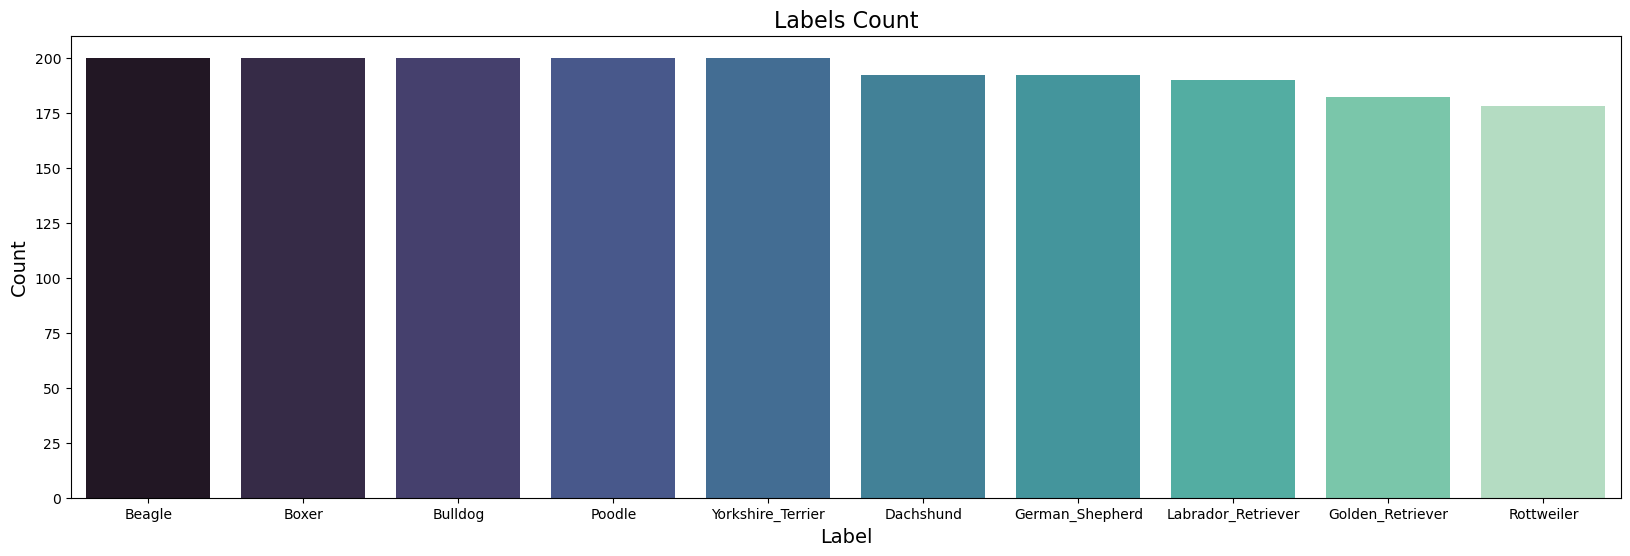

In [20]:
label_counts = image_df['Label'].value_counts()

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='mako')
plt.title('Labels Count', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

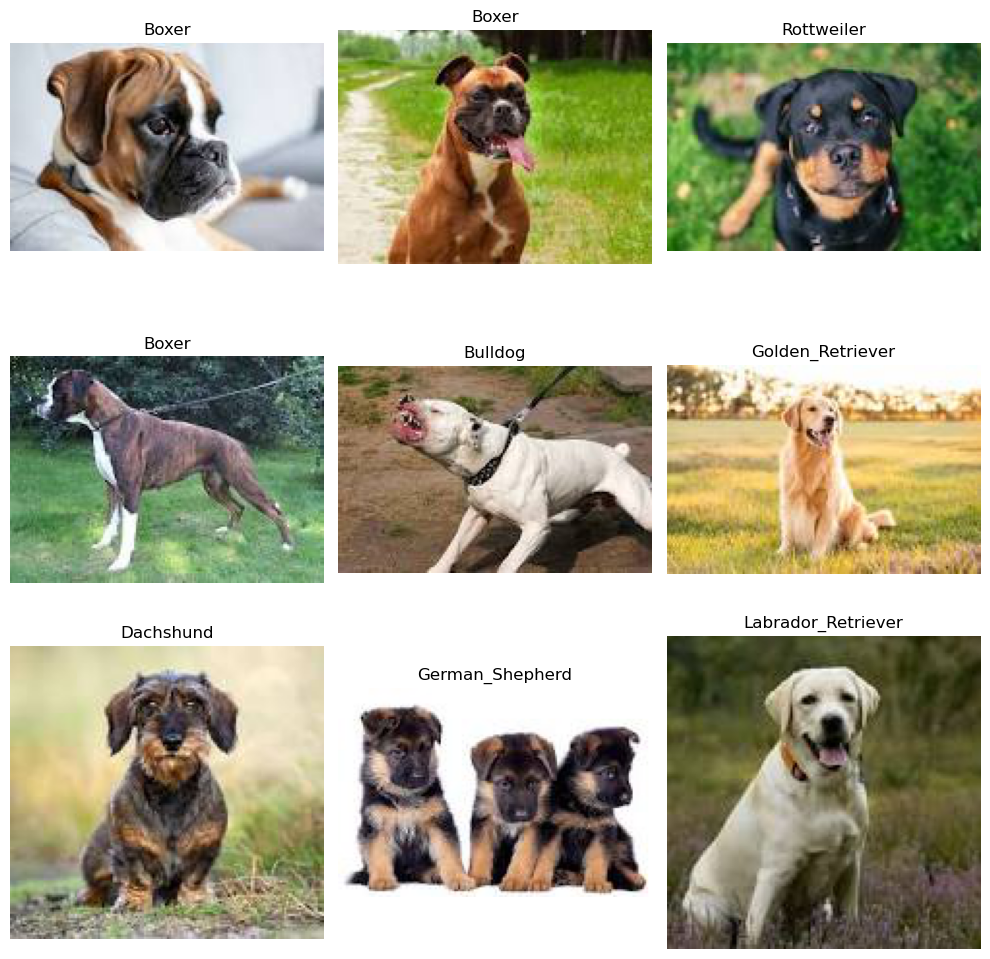

In [21]:
random_images = image_df.sample(n=9)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for ax, (index, row) in zip(axes, random_images.iterrows()):
    img = Image.open(row["Filepath"])
    ax.imshow(img)
    ax.set_title(row["Label"])
    ax.axis("off")

plt.tight_layout()
plt.show()

In [22]:
def image_to_array(filepath, size=(150, 150)):
    img = Image.open(filepath).resize(size)
    return np.array(img)

X = np.array([image_to_array(filepath) for filepath in image_df["Filepath"]])
y = np.array(image_df["Label"])

In [23]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1934, 150, 150, 3)
y shape: (1934,)


In [24]:
# X = no of images and image sizes (length, width, color channels)
# Y = Label size

# Data preprocessing part

In [25]:
X = X.astype('float32')
X /= 255

In [26]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [27]:
y = to_categorical(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024, shuffle=True)

In [29]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1547, 150, 150, 3)
X_test shape: (387, 150, 150, 3)
y_train shape: (1547, 10)
y_test shape: (387, 10)
